Transformer-based NLP topic modeling using the Python package BERTopic: modeling, prediction, and visualization

# Intro

BERTopic is a topic modeling python library that uses the combination of transformer embeddings and clustering model algorithms to identify topics in NLP (Natual Language Processing).
Topics involved-
* How transformers, c-TF-IDF, and clustering models are used behind the BERTopic?
* How to extract and interpret topics from the topic modeling results?
* How to make predictions using topic modeling?
* How to save and load a BERTopic topic model?

# Step 0: BERTopic Model Algorithms

In step 0, we will talk about the algorithms behind the BERTopic model.
* **Documents Embedding**: Firstly, we need to get the embeddings for all the documents. Embeddings are the vector representation of the documents.
 * BERTopic uses the English version of the `sentence_transformers` by default to get document embeddings.
 
 * If there are multiple languages in the document, we can use `BERTopic(language="multilingual")` to support the topic modeling of over 50 languages.
 * BERTopic also supports the pre-trained models from other python packages such as hugging face and flair.
* **Documents Clustering**: After the text documents have been transformed into embeddings, the next step is to run a clustering model on the embedded documents. Because the embedding vectors usually have very high dimensions, **dimension reduction techniques are used to reduce the dimensionalities.** 
 * The default algorithm for dimension reduction is UMAP (Uniform Manifold Approximation & Projection). Compared with other dimension reduction techniques such as PCA (Principle Component Analysis), UMAP maintains the data's local and global structure when reducing the dimensionality, which is important for representing the semantics of the text data. BERTopic provides the option of using other dimensionality reduction techniques by changing the `umap_model` value in the `BERTopic` method.
 
 * The** default algorithm for clustering is HDBSCAN**. HDBSCAN is a density-based clustering model? It identifies the number of clustering automatically, and does not require specifying the number of clusters beforehand like most of the clustering models.
* **Topic Representation**: After assigning each document in the corpus into a cluster, the next step is to get the topic representation using a class-based TF-IDF called c-TF-IDF. The top words with the highest c-TF-IDF scores are selected to represent each topic.
 * c-TF-IDF is similar to TF-IDF in that it measures the term importance by term frequencies while taking into account the whole corpus (all the text data for the analysis).
 * c-TF-IDF is different from TF-IDF in that the term frequency level is different. In the regular TF-IDF, TF measures the term frequency in each document. While in the c-TF-IDF, TF measures the term frequency in each cluster, and each cluster includes many documents.
* **Maximal Marginal Relevance (MMR)** (optional): After extracting the most important terms describing each cluster, there is an optional step to optimize the terms using Maximal Marginal Relevance (MMR). Maximal Marginal Relevance (MMR) has two benefits:
 * The first benefit is to increase the coherence among the terms for the same topic and remove irrelevant terms.
 * The second benefit is to increase the topic representation by removing synonyms and variations of the same words.


# Step 1: Install And Import Python Libraries

In step 1, we will install and import python libraries.

Firstly, let's import `bertopic`.

In [1]:
# Install bertopic
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 50.0 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=819467 sha256=ecf130aced3dd68687586fa1031ba8342dc6fd08b72f57de30677570987378a6
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=8809d4a2699f279bf8e10ca80efcc8bf2ef387b950044f7d94fb7203e6df3f63
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully 

In [2]:
# Try to import BERTopic
from bertopic import BERTopic

/opt/conda/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/conda/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/conda/lib/python3.10/site-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argume

Before the incompatibility issue between `joblib` and `HDBSCAN` is fixed, we can solve this issue by installing an old version of `joblib`. In this example, we used `joblib` version 1.1.0. After installing `joblib`, we need to restart the runtime.

In [4]:
# Install older version of joblib
!pip install --upgrade joblib==1.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 6.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.3.1 requires scipy<1.11,>=1.4.1, but you have scipy 1.11.2 which is incompatible.


After installing the python packages, we will import the python libraries.
* `pandas` and `numpy` are imported for data processing.
* `nltk` is imported for text preprocessing. We downloaded the information for removing stopwords and lemmatization from `nltk`.
* `BERTopic` is imported for the topic modeling.
* `UMAP` is for dimension reduction.


In [3]:
# Install older version of joblib
!pip install --upgrade numpy==1.22.1
# scipy-1.11.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 50.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.7 which is incompatible.
chex 0.1.82 requires numpy>=1.25.0, but you have numpy 1.22.1 which is incompatible.
librosa 0.10.1 requires numpy!=1.22.0,!=1.22.1,!=1.22.2,>=1.20.3, but you have numpy 1.22.1 which is incompatible.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.11.2 which is incompatible.
ydata-profiling 4.3.1 requires scipy<1.11,>=1.4.1, but you have scipy 1.11.2 which is incompatible.


In [4]:
# Data processing
import pandas as pd
import numpy as np

# Text preprocessiong
import nltk
nltk.download('stopwords')
# nltk.download('omw') #omw-1.4
nltk.download('punkt')
import re
import nltk
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
# Topic model
from bertopic import BERTopic

# Dimension reduction
from umap import UMAP

import matplotlib.pyplot as plt
import seaborn as sns
from gensim.corpora import Dictionary
import time

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Step 2: Download And Read Data

Now let's read the data into a `pandas` dataframe and see what the dataset looks like.

The dataset has two columns. One column contains the reviews and the other column contains the sentiment label for the review. 

In [22]:
import pandas as pd
# Specify the CSV file path
csv_file1 = '/kaggle/input/col865/results/reviews_playstore_all.csv'

# Save the DataFrame to a CSV file
df_whole=pd.read_csv(csv_file1)
df_whole.head()


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,f2a7f983-75d9-4c3b-b306-4c4772b5ad5b,Aparna singh,https://play-lh.googleusercontent.com/a/AAcHTt...,There is no clarity for the services and there...,1,103,7.5.9,2023-08-04 10:20:04,"Hi Aparna,\nApologies for the less-than-ideal ...",2023-08-04 10:26:42,7.5.9
1,d7f92130-0430-4eb0-8582-aac4c6770abc,Shiv G,https://play-lh.googleusercontent.com/a-/AD_cM...,I just can't find your phone no. Or call me ba...,1,673,7.4.99,2023-06-01 13:08:48,"Hi Shivesh,\nWe're really sorry that you’re ex...",2023-06-01 13:24:57,7.4.99
2,f25b2b7b-eaf3-4a3f-9c2d-8aed464aca1d,Shatabhisha Ghosh,https://play-lh.googleusercontent.com/a-/AD_cM...,App does not open when you need it to open and...,1,4,7.5.11,2023-08-29 03:25:49,"Hi Shatabhisha,\nWe apologize for the inconven...",2023-08-29 03:38:39,7.5.11
3,78dab723-dc59-4f21-8ffb-723d6b1fedb3,Madhurjya Baruah,https://play-lh.googleusercontent.com/a-/AD_cM...,The application is becoming more and more unus...,2,13,7.5.10,2023-08-15 14:49:02,"Hi Madhurjya,\nApologies for the less-than-ide...",2023-08-15 14:58:34,7.5.10
4,af1a9654-77ae-4bb9-8977-37e13b5d408f,Navlyn Anna,https://play-lh.googleusercontent.com/a-/AD_cM...,Pretty good app but it was hard to use in the ...,4,4,7.5.11,2023-08-25 23:45:13,"Hi Navlyn,\nWe have taken your feedback and it...",2023-08-26 01:20:07,7.5.11


In [23]:
reviews=df_whole['content']
scores=df_whole['score']

In [8]:
len(reviews)

107062

In [9]:
significant=reviews.isna().sum()
significant

4

In [10]:
# choose review col
df_reviews = df_whole[['content']]
df_reviews

,content
0,There is no clarity for the services and there...
1,I just can't find your phone no. Or call me ba...
2,App does not open when you need it to open and...
3,The application is becoming more and more unus...
4,Pretty good app but it was hard to use in the ...
...,...
107057,Overall good
107058,Excellent service
107059,Good service
107060,Excellent job


In [11]:
df_reviews=df_reviews[(df_reviews['content'].isna()==False)]
df_reviews

,content
0,There is no clarity for the services and there...
1,I just can't find your phone no. Or call me ba...
2,App does not open when you need it to open and...
3,The application is becoming more and more unus...
4,Pretty good app but it was hard to use in the ...
...,...
107057,Overall good
107058,Excellent service
107059,Good service
107060,Excellent job


`.info` helps us to get information about the dataset.

From the output, we can see that this data set has 1000 records, and no missing data. The 'review' column is the `object` type.

In [12]:
# Get the dataset information
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107058 entries, 0 to 107061
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   content  107058 non-null  object
dtypes: object(1)
memory usage: 1.6+ MB


### Dataset analysis before preprocessing

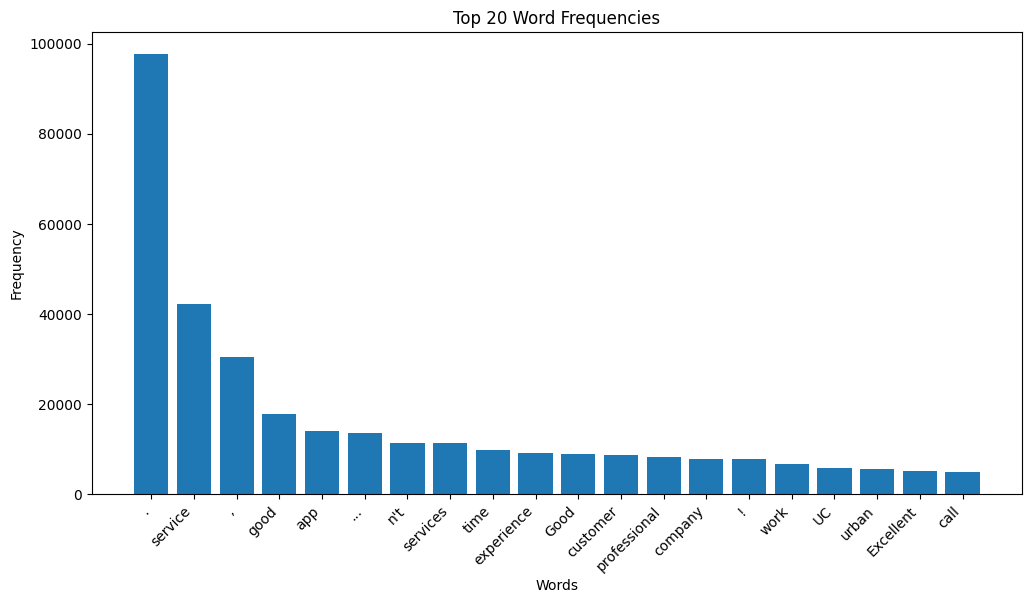

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Sample DataFrame with sentences
df = df_reviews
# Combine all sentences into a single text
all_text = ' '.join(df['content'])

# Tokenize the text into words
words = nltk.word_tokenize(all_text)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stop_words]

# Count word frequencies
word_counts = Counter(filtered_words)

# Get the top 20 word frequencies
top_20_words = word_counts.most_common(20)

# Plot the results
words, frequencies = zip(*top_20_words)
plt.figure(figsize=(12, 6))
plt.bar(words, frequencies)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Word Frequencies')
plt.show()


# Step 3: Text Data Preprocessing (Optional)

In step 3, we included some sample code for text data preprocessing.

Generally speaking, there is no need to preprocess the text data when using the python BERTopic model. However, since our dataset is a simple dataset, a lot of stopwords are picked to represent the topics.

Therefore, we removed stopwords and did lemmatization as data preprocessing. But please ignore this step if this is not an issue for you.

### stopwords removal

In [26]:
# Remove stopwords
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
stopwords = set(stopwords)
print("before",len(stopwords))
stopwords.update(["do", "good", "bad", "nice","awesome", "superb", "excellent", "go", "great","grt8", "very", "there",
                              "one", "two", "three", "first", "second", "third", "1st", "2nd", "3rd",
                              "four", "five", "six", "seven", "eight", "nine", "zero", "ten", "twenty",
                              "hundred", "thousand", "million", "billion", "trillion","thanks","also","get","got"])
# add more custom -sentiment related impp
print(f'There are {len(stopwords)} default stopwords. They are {stopwords}')

before 179
There are 215 default stopwords. They are {"couldn't", 'other', "wouldn't", 'you', 's', 'hundred', 'before', 'aren', 'through', 'first', 'seven', 'we', 'shouldn', 'great', 'million', 'trillion', 'thousand', 'four', 'where', 'about', 'while', 'whom', "shouldn't", 'our', 'were', 'be', 'at', 'yourself', 'now', "needn't", "won't", 'who', 'than', "wasn't", 'three', 'between', 'me', 'her', 'having', 'in', 'there', 'ten', "should've", 'nice', 'above', 'few', 'will', 'down', 'off', 'do', 'when', 'an', 'under', 'only', 'or', 'eight', 'has', 'very', 'both', 'too', 'she', "you'll", 'such', 'weren', 'him', 'up', 'those', 'superb', 'any', 'excellent', 't', 'that', 'shan', "hadn't", 'couldn', 'bad', 'these', 'didn', 'herself', 'also', 'hasn', 'same', 'so', "aren't", 'himself', "isn't", 'no', '2nd', 'won', 'ma', 'they', 'wasn', 'for', 'had', 'zero', "she's", 'what', 'can', 'just', 'a', 'nor', "haven't", 'wouldn', 'my', 'don', 'once', 'hadn', "doesn't", 'with', "mustn't", 'been', 'one', "yo

In [27]:
# preprocessing
df_reviews['content']=df_reviews['content'].str.replace("[^a-zA-Z#]", " ")
# for removing words less than 2
df_reviews['content'] = df_reviews['content'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
# Remove stopwords
df_reviews['content_preprocessed'] = df_reviews['content'].apply(lambda x: ' '.join([w.lower() for w in x.split() if w.lower() not in stopwords]))


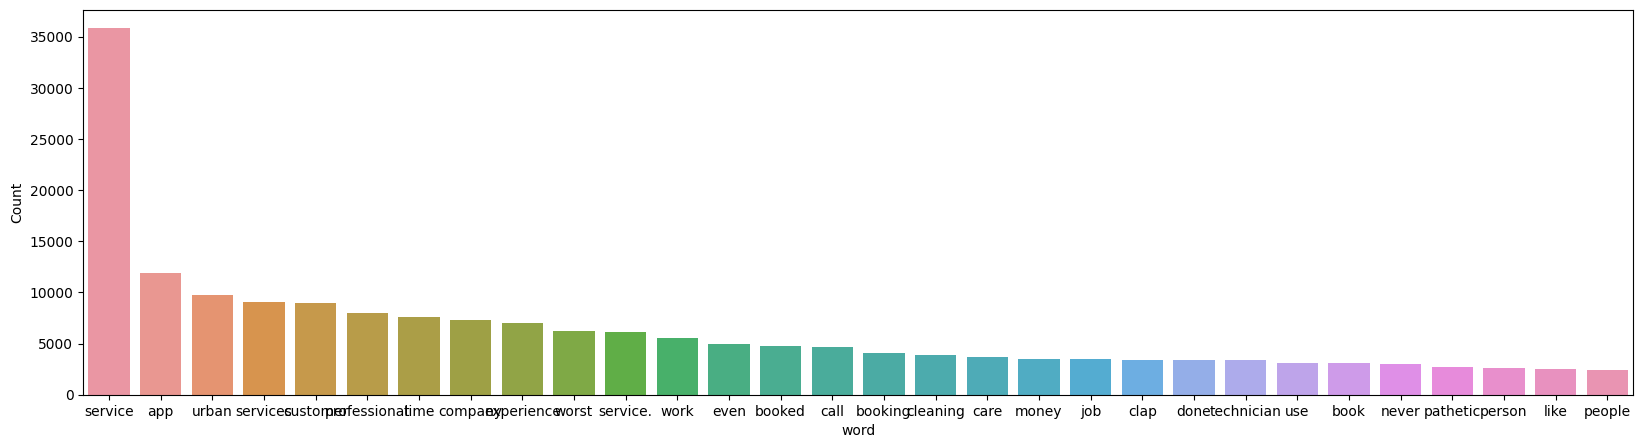

In [28]:
def frequent_words(x,n = 30):
    words = ' '.join([text for text in x])
    c_words = words.split()

    frequency_distribution = FreqDist(c_words)
    words_df = pd.DataFrame({'word':list(frequency_distribution.keys()), 'count':list(frequency_distribution.values())})

    # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = n) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()
frequent_words(df_reviews['content_preprocessed'])

In [29]:
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
def lemmatization(texts, tags=['NOUN', 'ADJ', 'VERB']):
    output = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output

In [30]:
tokenized_reviews = df_reviews['content_preprocessed'].apply(lambda x: x.split())
print(tokenized_reviews[1])

["can't", 'find', 'phone', 'no.', 'call', 'back', 'option.', 'used', 'option', 'talk', 'customer', 'care', 'someone', 'used', 'guide', 'requirements.', 'due', 'lack', 'able', 'book', 'services.', 'looked', 'everywhere', 'app', "can't", 'find', 'connect', 'customer', 'care,', 'annoying..', 'sure', 'app', 'design', 'issue', 'intentionally', 'it.', 'intentional', 'wonder', 'customer', "can't", 'talk', 'able', 'book', 'services', '!!!']


In [ ]:
reviews_l = lemmatization(tokenized_reviews)
reviews_l

### Dataset analysis after preprocessing

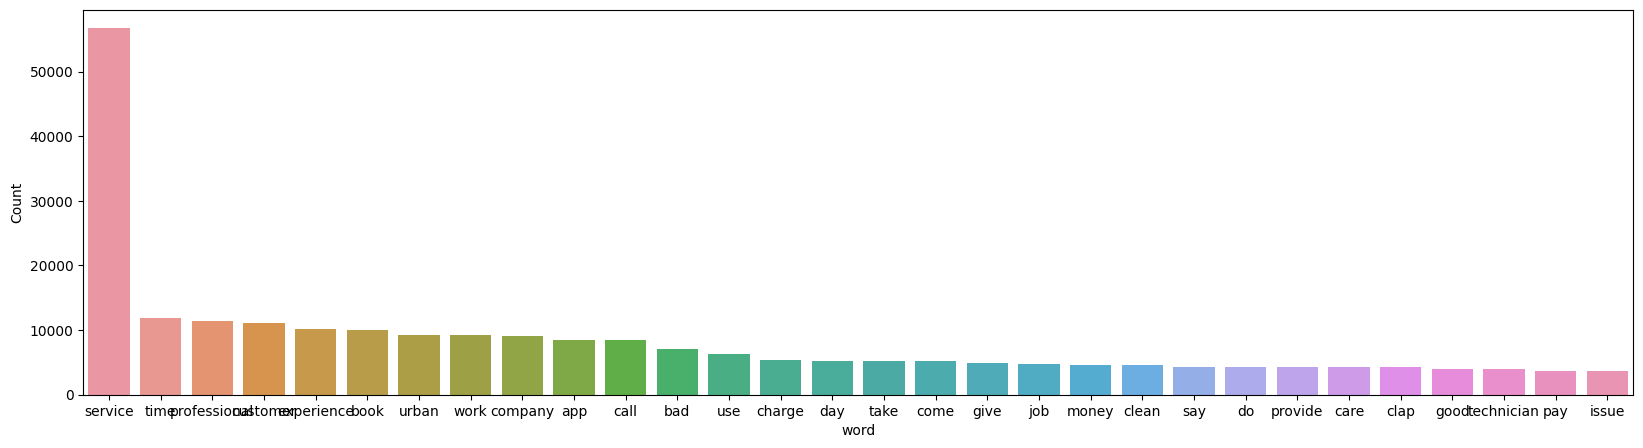

In [32]:
reviews_f = []
for i in range(len(reviews_l)):
    reviews_f.append(' '.join(reviews_l[i]))

df_reviews['content_preprocessed'] = reviews_f

frequent_words(df_reviews['content_preprocessed'], 30)

In [33]:
# Save the DataFrame as a CSV file
df_reviews[['content_preprocessed']].to_csv('content_preprocessed.csv', index=False)
# Read the CSV file into a DataFrame
# df_reviews= pd.read_csv('content_preprocessed.csv')

# Step 4: Topic Modeling Using BERTopic

In step 4, we will build the topic model using BERTopic.

BERTopic model by default produces different results each time because of the stochasticity inherited from UMAP.

To get reproducible topics, we need to pass a value to the `random_state` parameter in the `UMAP` method.
* `n_neighbors=15` means that the local neighborhood size for UMAP is 15. This is the parameter that controls the local versus global structure in data.

* A high value pushes UMAP to look at broader neighborhood, and may lose details on local structure.
 * The default `n_neighbors` values for UMAP is 15.
* `n_components=5` indicates that the target dimension from UMAP is 5. This is the dimension of data that will be passed into the clustering model.
* `min_dist` controls how tightly UMAP is allowed to pack points together. It's the minimum distance between points in the low dimensional space.
 * Small values of `min_dist` result in clumpier embeddings, which is good for clustering. Since our goal of dimension reduction is to build clustering models, we set `min_dist` to 0.
 * Large values of `min_dist` prevent UMAP from packing points together and preserves the broad structure of data.
* `metric='cosine'` indicates that we will use cosine to measure the distance.
* `random_state` sets a random seed to make the UMAP results reproducible.

After initiating the UMAP model, we pass it to the BERTopic model, set the language to be English, and set the `calculate_probabilities` parameter to `True`.

Finally, we pass the processed review documents to the topic model and saved the results for topics and topic probabilities.
 * The values in `topics` represents the topic each document is assigned to.
 * The values in `probabilities` represents the probability of a document belongs to each of the topics.

In [ ]:
from time import time
t1=time()
# Initiate UMAP
umap_model = UMAP(n_neighbors=15,
                  n_components=5,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=100)

# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model,nr_topics=12, language="english", calculate_probabilities=True,verbose=True)
X_train = df_reviews['content_preprocessed']
# Run BERTopic model
topics, probabilities = topic_model.fit_transform(X_train)
t =time()-t1
print("time taken", t)
# time taken 16269.42327451706
# time taken for complete training is around 4-5 hours

In [40]:
# save the model to disk
import pickle
filename = 'bertopic_model_1.sav'
pickle.dump(topic_model, open(filename, 'wb'))
# some time later load...
 


/opt/conda/lib/python3.10/site-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



# Step 5: Extract Topics From Topic Modeling

In step 5, we will extract topics from the BERTopic modeling results.

Using the attribute `get_topic_info()` on the topic model gives us the list of topics. We can see that the output gives us 31 rows in total.
* Topic -1 should be ignored. It indicates that the reviews are not assigned to any specific topic. The count for topic -1 is 322, meaning that there are 322 reviews as outliers that do not belong to any topic.
* Topic 0 to topic 29 are the 30 topics created for the reviews. It was ordered by the number of reviews in each topic, so topic 0 has the highest number of reviews.
* The `Name` column lists the top terms for each topic. For example, the top 4 terms for Topic 0 are sound, quality, volume, and audio, indicating that it is a topic related to sound quality.

In [5]:
# load the model from disk
import pickle
filename = 'bertopic_model_1.sav'
loaded_model = pickle.load(open(filename, 'rb'))



In [6]:
type(loaded_model)

bertopic._bertopic.BERTopic

In [28]:
#load
df_reviews=pd.read_csv('content_preprocessed.csv')
# df_reviews['content_preprocessed']
X_train = df_reviews['content_preprocessed']
topic_model=loaded_model

In [9]:
# Get the list of topics
topic_info=topic_model.get_topic_info()
topic_info

,Topic,Count,Name,Representation,Representative_Docs
0,-1,27661,-1_service_customer_time_book,"[service, customer, time, book, call, urban, a...",[poor customer care service technician work go...
1,0,45300,0_service_experience_professional_work,"[service, experience, professional, work, comp...","[service, service, service]"
2,1,29442,1_good_useful_helpful_amazing,"[good, useful, helpful, amazing, gud, excellen...","[good, good, good]"
3,2,2618,2_app_useful_application_helpful,"[app, useful, application, helpful, good, use,...","[app, app, app]"
4,3,1319,3_high_expensive_price_costly,"[high, expensive, price, costly, rate, value, ...","[high price, price high, price high]"
5,4,285,4_location_available_area_slot,"[location, available, area, slot, facility, se...","[location available, available location, avail..."
6,5,183,5_easy_interface_book_initiative,"[easy, interface, book, initiative, nic, tutor...","[easy book service, easy book service, easy bo..."
7,6,109,6_fan_repair_electrician_ceiling,"[fan, repair, electrician, ceiling, take, char...","[book fan clean do fan clean new, fan, repair ..."
8,7,78,7_relax_therapist_tension_relaxing,"[relax, therapist, tension, relaxing, treatmen...","[relax, relax, relax]"
9,8,36,8_artist_decoration_mehendi_party,"[artist, decoration, mehendi, party, style, de...","[artist, artist, artist]"


In [10]:
type(topic_info)

pandas.core.frame.DataFrame

If more than 4 terms are needed for a topic, we can use `get_topic` and pass in the topic number. For example, `get_topic(0)` gives us the top 10 terms for topic 0 and their relative importance.

In [11]:
# Get top 10 terms for a topic
topic_model.get_topic(0)

[('service', 0.07443686859669044),
 ('experience', 0.03628402802800986),
 ('professional', 0.03376384132636164),
 ('work', 0.030207917793360444),
 ('company', 0.027414109972904718),
 ('urban', 0.025992569603357135),
 ('time', 0.025896846326480035),
 ('book', 0.024659575832958667),
 ('clean', 0.02422900560570799),
 ('job', 0.02363342410828948)]

We can visualize the top keywords using a bar chart. `top_n_topics=12` means that we will create bar charts for the top 12 topics. The length of the bar represents the score of the keyword. A longer bar means higher importance for the topic.

In [12]:
# Visualize top topic keywords
topic_model.visualize_barchart(top_n_topics=12)

Another view for keyword importance is the "Term score decline per topic" chart. It's a line chart with the term rank being the x-axis and the c-TF-IDF score on the y-axis.

There are a total of 31 lines, one line for each topic. Hovering over the line shows the term score information.

In [13]:
# Visualize term rank decrease
topic_model.visualize_term_rank()

# Step 6: Topic Similarities

In step 6, we will analyze the relationship between the topics generated by the topic model.

We will use three visualizations to study how the topics are related to each other. The three methods are intertopic distance map, the hierarchical clustering of topics, and the topic similarity matrix.

Intertopic distance map measures the distance between topics. Similar topics are closer to each other, and very different topics are far from each other. From the visualization, we can see that there are five topic groups for all the topics. Topics with similar semantic meanings are in the same topic group.

The size of the circle represents the number of documents in the topics, and larger circles mean that more reviews belong to the topic.

In [18]:
# Visualize intertopic distance
topic_model.visualize_topics(custom_labels=True)

Another way to see how the topics are connected is through a hierarchical clustering graph. We can control the number of topics in the graph by the `top_n_topics` parameter.

In this example, the top 10 topics are included in the hierarchical graph. We can see that the sound quality topic is closely connected to the headset topic, and both of them are connected to the earpiece comfortable topic.

In [29]:
# Visualize connections between topics using hierachical clustering
topic_model.visualize_hierarchy(top_n_topics=11)

Heatmap can also be used to analyze the similarities between topics. The similarity score ranges from 0 to 1. A value close to 1 represents a higher similarity between the two topics, which is represented by darker blue color.

In [43]:
# Visualize similarity using heatmap
topic_model.visualize_heatmap()

# Step 7: Topic Model Predicted Probabilities

In step 7, we will talk about how to use BERTopic model to get predicted probabilities.

The topic prediction for a document is based on the predicted probabilities of the document belonging to each topic. The topic with the highest probability is the predicted topic. This probability represents how confident we are about finding the topic in the document.

We can visualize the probabilities using `visualize_distribution`, and pass in the document index. `visualize_distribution` has the default probability threshold of 0.015, so only the topic with a probability greater than 0.015 will be included.

In [21]:
len(topic_model.probabilities_)

107058

In [44]:
# Visualize probability distribution
topic_model.visualize_distribution(topic_model.probabilities_[0], min_probability=0.015)

In [30]:
# Check the content for the first review
X_train[0]

'clarity service tarrif service guy accept pay different accepted place ask revise correct invoice leave vague response explanation correct service take do disappoint'

In [35]:
X_train[7]

'horrible experience.tried book app payment deduct booking slot reflect help customer service connect app escalate concern unusual lose money service stay app pure case cheat pathetic customer experience basic feature recommend'

In [36]:
# Visualize probability distribution
topic_model.visualize_distribution(topic_model.probabilities_[7], min_probability=0.015)

We can also get the predicted probability for all topics using the code below.

In [46]:
# Get probabilities for all topics
topic_model.probabilities_[0]

array([5.61589298e-02, 5.03741535e-03, 4.57087367e-03, 2.47442514e-03,
       8.27363888e-04, 7.19236549e-04, 2.63316646e-04, 1.34394720e-04,
       1.02763788e-04, 2.64919821e-05, 9.13167195e-05])

# Step 8: Topic Model In-sample Predictions

In step 8, we will talk about how to make in-sample predictions using the topic model.

BERTopic model can output the predicted topic for each review in the dataset.

Using `.topics_`, we save the predicted topics in a list and then save it as a column in the review dataset.

In [37]:
# Get the topic predictions
topic_prediction = topic_model.topics_[:]

# Save the predictions in the dataframe
df_reviews['topic_prediction'] = topic_prediction

# Take a look at the data
df_reviews.head()

,content_preprocessed,topic_prediction
0,clarity service tarrif service guy accept pay ...,-1
1,find phone no . call option use option talk cu...,-1
2,open need open slow horrible trying cancel hap...,-1
3,application become unusable day service person...,-1
4,app hard use start find difficult understand a...,-1


In [40]:
df_reviews.tail()

,content_preprocessed,topic_prediction
107053,overall,3
107054,service,0
107055,service,0
107056,job,0
107057,NaN,1


# Step 9: Topic Model Predictions on New Data

In step 9, we will talk about how to use the BERTopic model to make predictions on new reviews.

Let's say there is a new review "I like the new headphone. Its sound quality is great.", and we would like to automatically predict the topic for this review.
* Firstly, let's decide the number of topics to include in the prediction.
 * If we would like to assign only one topic to the document, then the number of topics should be 1.  
 * If we would like to assign multiple topics to the document, then the number of topics should be greater than 1. Here we are getting the top 3 topics that are most relevant to the new review.
* After that, we pass the new review and the number of topics to the `find_topics` method. This gives us the topic number and the similarity value.
* Finally, the results are printed.


In [38]:
# New data for the review
new_review = "She created very friendly atmosphere and did her service really well. Appreciate her efforts."

# Find topics
num_of_topics = 3
similar_topics, similarity = topic_model.find_topics(new_review, top_n=num_of_topics);

# Print results
print(f'The top {num_of_topics} similar topics are {similar_topics}, and the similarities are {np.round(similarity,2)}')

The top 3 similar topics are [0, -1, 8], and the similarities are [0.41 0.38 0.27]


To verify if the assigned topics are a good fit for the new review, let's get the top keywords for the top 3 topics using the `get_topic` method.

In [39]:
# Print the top keywords for the top similar topics
for i in range(num_of_topics):
  print(f'The top keywords for topic {similar_topics[i]} are:')
  print(topic_model.get_topic(similar_topics[i]))

The top keywords for topic 0 are:
[('service', 0.07443686859669044), ('experience', 0.03628402802800986), ('professional', 0.03376384132636164), ('work', 0.030207917793360444), ('company', 0.027414109972904718), ('urban', 0.025992569603357135), ('time', 0.025896846326480035), ('book', 0.024659575832958667), ('clean', 0.02422900560570799), ('job', 0.02363342410828948)]
The top keywords for topic -1 are:
[('service', 0.04532055383130372), ('customer', 0.034649597209764245), ('time', 0.03385844970256409), ('book', 0.030536912853446695), ('call', 0.030094076720550086), ('urban', 0.027761306965280792), ('app', 0.027047195397547293), ('professional', 0.026837940007784535), ('company', 0.025747952941647678), ('bad', 0.02300948559881156)]
The top keywords for topic 8 are:
[('artist', 0.6886923720425581), ('decoration', 0.4424276928710843), ('mehendi', 0.3437488077073156), ('party', 0.12126294308528815), ('style', 0.10137866172588046), ('design', 0.08770179625777515), ('mehndi', 0.0784447829670

In [45]:
# final predictions
# topics mapping
dict_map ={"service":[0,6,7,8,9],
           "platform":[2,3,4,5,10],
           "mix":[1]  
}

In [54]:
labels =[]
prob_score=[]
n =len(topic_model.probabilities_)
for i in range(n):
    probs =topic_model.probabilities_[i]
    scores={
        "service":0,
           "platform":0,
           "mix":0
    }
    for j in dict_map["service"]:
        scores["service"]+=probs[j]
    for j in dict_map["platform"]:
        scores["platform"]+=probs[j]
    for j in dict_map["mix"]:
        scores["mix"]+=probs[j]
    prob=0
    category="none"
    if (scores["service"]>prob):
        prob =scores["service"]
        category="service"
    if (scores["platform"]>prob):
        prob =scores["platform"]
        category="platform"
    if (scores["mix"]>prob):
        prob =scores["mix"]
        category="mix"
    labels.append(category)
    prob_score.append(prob)

In [56]:
df_reviews["category"]=labels
df_reviews["prob_score"]=prob_score


In [57]:
df_reviews.head()

,content_preprocessed,topic_prediction,category,prob_score
0,clarity service tarrif service guy accept pay ...,-1,service,0.056686
1,find phone no . call option use option talk cu...,-1,service,0.056519
2,open need open slow horrible trying cancel hap...,-1,service,0.068385
3,application become unusable day service person...,-1,service,0.110129
4,app hard use start find difficult understand a...,-1,service,0.036404


## Analysis of results

In [64]:
labels =[]
prob_score=[]
n =len(topic_model.probabilities_)
for i in range(n):
    tpc =np.argmax(topic_model.probabilities_[i])
    probs =topic_model.probabilities_[i][tpc]
    for j in dict_map["service"]:
        if (j==tpc):
            category ="service"
    for j in dict_map["platform"]:
        if (j==tpc):
            category ="platform"
    for j in dict_map["mix"]:
        if (j==tpc):
            category ="platform"
    labels.append(category)
    prob_score.append(probs)

In [65]:
df_reviews["category"]=labels
df_reviews["prob_score"]=prob_score
df_reviews.head()

,content_preprocessed,topic_prediction,category,prob_score
0,clarity service tarrif service guy accept pay ...,-1,service,0.056159
1,find phone no . call option use option talk cu...,-1,service,0.056098
2,open need open slow horrible trying cancel hap...,-1,service,0.067787
3,application become unusable day service person...,-1,service,0.109115
4,app hard use start find difficult understand a...,-1,service,0.036068


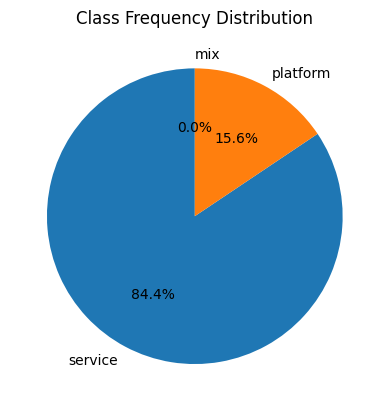

In [66]:
import matplotlib.pyplot as plt

# Sample list of predicted classes
predicted_classes =df_reviews["category"]
# Count the frequency of each class
class_counts ={
        "service":0,
           "platform":0,
           "mix":0
    }
for j in predicted_classes:
    class_counts[j]+=1
# Data for the pie chart
label = ["service","platform","mix"]
sizes = [class_counts["service"],class_counts["platform"],class_counts["mix"]]

# Create a pie chart
plt.pie(sizes, labels=label, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Class Frequency Distribution')

# Display the pie chart
plt.show()


### Urban company data testing on this model

In [ ]:
import pandas as pd
# Specify the CSV file path
csv_file2 ='/kaggle/input/col865/urban.clap.data.csv'
# Save the DataFrame to a CSV file
df_whole1=pd.read_csv(csv_file2)
df_whole1.head()

In [ ]:
data=df_whole1[]

In [ ]:

from sklearn.model_selection import train_test_split

# Perform the 80/20 split
X_train1, X_test = train_test_split(data, test_size=0.2, random_state=42)

# 'X_train' contains 80% of the data.
# 'X_test' contains 20% of the data.
len(X_train1)

In [ ]:
topics1, probabilities1 = topic_model.transform(X_test)

In [ ]:
labels =[]
prob_score=[]
n =len(probabilities1)
for i in range(n):
    tpc =np.argmax(probabilities1[i])
    probs =topic_model.probabilities_[i][tpc]
    for j in dict_map["service"]:
        if (j==tpc):
            category ="service"
    for j in dict_map["platform"]:
        if (j==tpc):
            category ="platform"
    for j in dict_map["mix"]:
        if (j==tpc):
            category ="platform"
    labels.append(category)
    prob_score.append(probs)

In [ ]:
df_reviews["category"]=labels
df_reviews["prob_score"]=prob_score
df_reviews.head()

# Step 10: Save and Load Topic Models

In step 10, we will talk about how to save and load BERTopic models.

The trained BERTopic model and its settings can be saved using `.save`. UMAP and HDBSCAN are saved, but the documents and embeddings are not saved.

We can use `.load` to load the saved BERTopic model.

In [59]:
type(topic_model)

bertopic._bertopic.BERTopic

In [ ]:
# Save the topic model
topic_model.save("review_topic_model")

# Load the topic model
my_model = BERTopic.load("review_topic_model")

# References

* [BERTopic GitHub](https://github.com/MaartenGr/BERTopic)
* [Documentation on BERTopic algorithms](https://maartengr.github.io/BERTopic/algorithm/algorithm.html#visual-overview)
* [UMAP documentation](https://umap-learn.readthedocs.io/en/latest/parameters.html)